In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Create a dataset
Let's create a N points dataset assuming that k < N points belong to one cluster, and N-k points belong to another cluster. We'll draw k points from a normal distribution with a center at the location C1, N-k points from another normal distribution with a center at the location C2.

In [21]:
N = 100
k = 20
points_c1 = np.random.normal(loc=[11,11], scale=[2.0, 0.5], size=(k,2))
points_c2 = np.random.normal(loc=[18, 18], scale=[0.6, 3.0], size=(N-k,2))

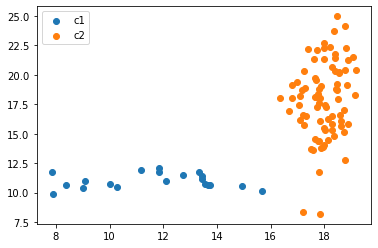

In [24]:
plt.scatter([p[0] for p in points_c1], [p[1] for p in points_c1], label='c1')
plt.scatter([p[0] for p in points_c2], [p[1] for p in points_c2], label='c2')
plt.legend()

In [25]:
data = np.concatenate((points_c1, points_c2), axis=0)

In [26]:
data.shape

(100, 2)

In [27]:
data[:3]

array([[13.75182319, 10.61851735],
       [10.02626379, 10.70275207],
       [ 7.85087945, 11.7250353 ]])

### K-means clustering

In [28]:
# Initiate cluster centers, the means
c1 = [
    np.random.randint(min([p[0] for p in data]), max([p[0] for p in data])),
    np.random.randint(min([p[1] for p in data]), max([p[1] for p in data]))
       ]

c2 = [
    np.random.randint(min([p[0] for p in data]), max([p[0] for p in data])),
    np.random.randint(min([p[1] for p in data]), max([p[1] for p in data]))
       ]

In [29]:
print(c1, c2)

[17, 19] [14, 17]


In [30]:
def get_distance(p1, p2):
    #Input: p1 and p2 are 2-dimentional arrays that represent coordinates
    #Output: Euclidian distance between p1 and p2
    return ((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)**0.5

def get_centroind(data):
    # Input: array of 2-d arrays that represent data points coordinates
    # Output: 2-d array that represents data centroid
    n = len(data)
    x = [p[0] for p in data]
    y = [p[1] for p in data]
    mean_x = sum(x)/n
    mean_y = sum(y)/n
    return [mean_x, mean_y]

In [31]:
get_distance(c1, c2)

3.605551275463989

In [32]:
# Divide data points into two groups based on the distance from C1 and C2
cluster_1 = []
cluster_2 = []
for p in data:
    if get_distance(p,c1) <= get_distance(p,c2):
        cluster_1.append(p)
    else:
        cluster_2.append(p)

In [33]:
# Recalculate the new centroinds position
c1_new = get_centroind(cluster_1)
c2_new = get_centroind(cluster_2)

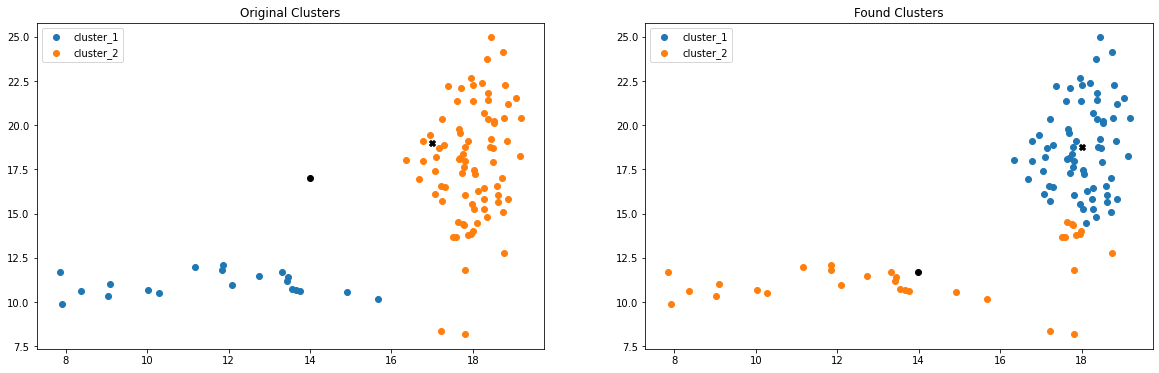

In [34]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
ax[0].scatter([p[0] for p in points_c1], [p[1] for p in points_c1], label='cluster_1')
ax[0].scatter([p[0] for p in points_c2], [p[1] for p in points_c2], label='cluster_2')
ax[0].scatter(c1[0], c1[1], color='black', marker='X')
ax[0].scatter(c2[0], c2[1], color='black', marker='o')
ax[0].set_title('Original Clusters')
ax[0].legend()

ax[1].scatter([p[0] for p in cluster_1], [p[1] for p in cluster_1], label='cluster_1')
ax[1].scatter([p[0] for p in cluster_2], [p[1] for p in cluster_2], label='cluster_2')
ax[1].scatter(c1_new[0], c1_new[1], color='black', marker='X')
ax[1].scatter(c2_new[0], c2_new[1], color='black', marker='o')
ax[1].set_title('Found Clusters')
ax[1].legend()

In [35]:
get_distance(c1, c1_new)

1.0378593042076731

In [36]:
get_distance(c2, c2_new)

5.328370120739197

In [40]:
# Repeat reassigning clusters until centroids move no more than d=0.5
cntr = 0

while get_distance(c1, c1_new) > 0.1 or get_distance(c2, c2_new) > 0.1:
    c1 = c1_new
    c2 = c2_new
    cluster_1 = []
    cluster_2 = []
    for p in data:
        if get_distance(p,c1) <= get_distance(p,c2):
            cluster_1.append(p)
        else:
            cluster_2.append(p)
    # Recalculate the new centroinds position
    c1_new = get_centroind(cluster_1)
    c2_new = get_centroind(cluster_2)
    cntr +=1

In [41]:
cntr

3

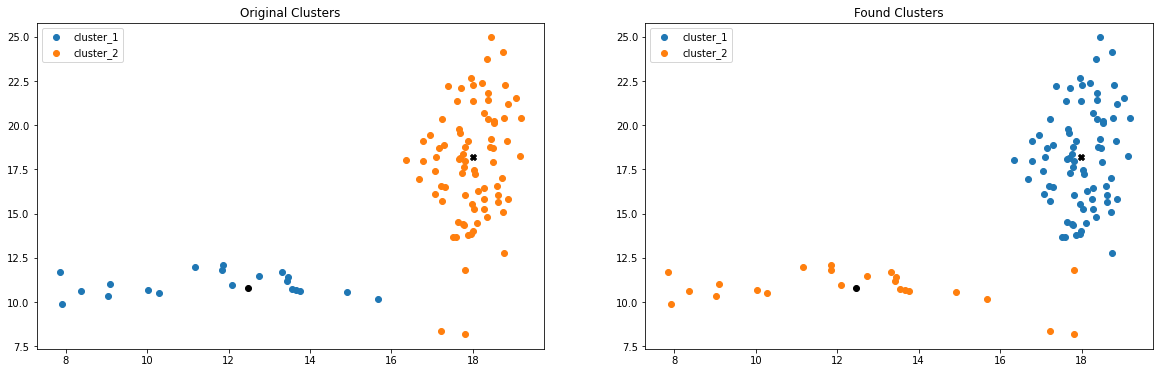

In [42]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
ax[0].scatter([p[0] for p in points_c1], [p[1] for p in points_c1], label='cluster_1')
ax[0].scatter([p[0] for p in points_c2], [p[1] for p in points_c2], label='cluster_2')
ax[0].scatter(c1[0], c1[1], color='black', marker='X')
ax[0].scatter(c2[0], c2[1], color='black', marker='o')
ax[0].set_title('Original Clusters')
ax[0].legend()

ax[1].scatter([p[0] for p in cluster_1], [p[1] for p in cluster_1], label='cluster_1')
ax[1].scatter([p[0] for p in cluster_2], [p[1] for p in cluster_2], label='cluster_2')
ax[1].scatter(c1_new[0], c1_new[1], color='black', marker='X')
ax[1].scatter(c2_new[0], c2_new[1], color='black', marker='o')
ax[1].set_title('Found Clusters')
ax[1].legend()